In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('breast-cancer-dataset.csv')

# Display the first few rows of the dataset
print(data.head())


   S/N  Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes Breast  Metastasis  \
0    1  2019   40          1                2          0  Right           0   
1    2  2019   39          1                2          0   Left           0   
2    3  2019   45          0                4          0   Left           0   
3    4  2019   26          1                3          0   Left           0   
4    5  2019   21          1                1          0  Right           0   

  Breast Quadrant  History Diagnosis Result  
0     Upper inner        0           Benign  
1     Upper outer        0           Benign  
2     Lower outer        0           Benign  
3     Lower inner        1           Benign  
4     Upper outer        1           Benign  


In [2]:
# Check for missing values
print(data.isnull().sum())

# Display basic information about the dataset
print(data.info())


S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               206 non-null    int64 
 1   Year              206 non-null    int64 
 2   Age               206 non-null    int64 
 3   Menopause         206 non-null    int64 
 4   Tumor Size (cm)   206 non-null    int64 
 5   Inv-Nodes         206 non-null    int64 
 6   Breast            206 non-null    object
 7   Metastasis        206 non-null    int64 
 8   Breast Quadrant   206 non-null    object
 9   History           206 non-null    int64 
 10  Diagnosis Result  206 non-null    object
dtypes: int64(8), object(3)
memory usage: 

In [3]:
# Descriptive statistics
print(data.describe(include='all'))


               S/N         Year         Age   Menopause  Tumor Size (cm)  \
count   206.000000   206.000000  206.000000  206.000000       206.000000   
unique         NaN          NaN         NaN         NaN              NaN   
top            NaN          NaN         NaN         NaN              NaN   
freq           NaN          NaN         NaN         NaN              NaN   
mean    106.776699  2019.519417   39.640777    0.665049         4.291262   
std      61.687716     0.500840   14.164438    0.473123         2.566695   
min       1.000000  2019.000000   13.000000    0.000000         1.000000   
25%      54.250000  2019.000000   30.000000    0.000000         2.000000   
50%     106.500000  2020.000000   40.000000    1.000000         4.000000   
75%     158.750000  2020.000000   49.000000    1.000000         6.000000   
max     213.000000  2020.000000   77.000000    1.000000        14.000000   

         Inv-Nodes Breast  Metastasis Breast Quadrant     History  \
count   206.000000

### Data Visualization

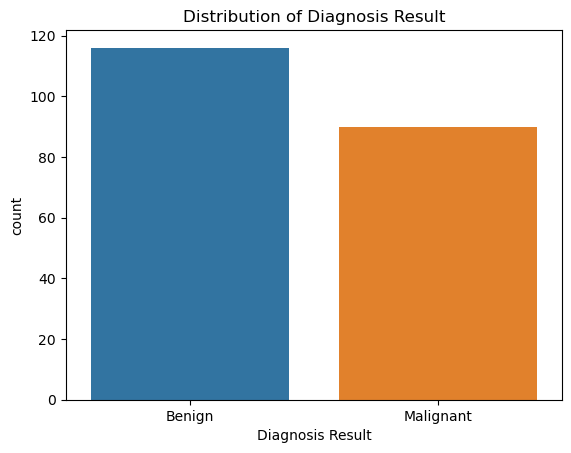

In [4]:
sns.countplot(x='Diagnosis Result', data=data)
plt.title('Distribution of Diagnosis Result')
plt.show()


C:\Users\Lexer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lexer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lexer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lexer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

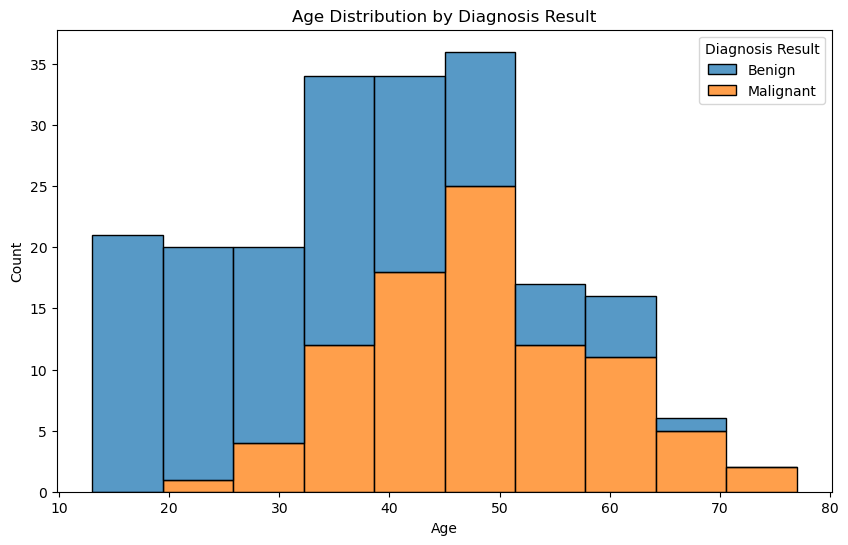

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Diagnosis Result', multiple='stack')
plt.title('Age Distribution by Diagnosis Result')
plt.show()


0


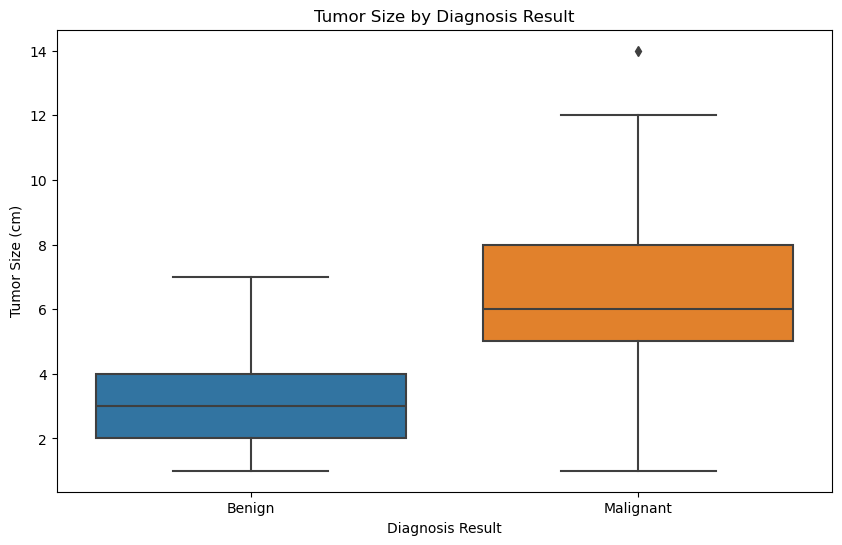

In [6]:
# Convert 'Tumor Size (cm)' to numeric, coerce errors to NaN
data['Tumor Size (cm)'] = pd.to_numeric(data['Tumor Size (cm)'], errors='coerce')

# Check for any remaining NaN values in 'Tumor Size (cm)'
print(data['Tumor Size (cm)'].isnull().sum())

# Drop rows with NaN values in 'Tumor Size (cm)' for simplicity
data = data.dropna(subset=['Tumor Size (cm)'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis Result', y='Tumor Size (cm)', data=data)
plt.title('Tumor Size by Diagnosis Result')
plt.show()


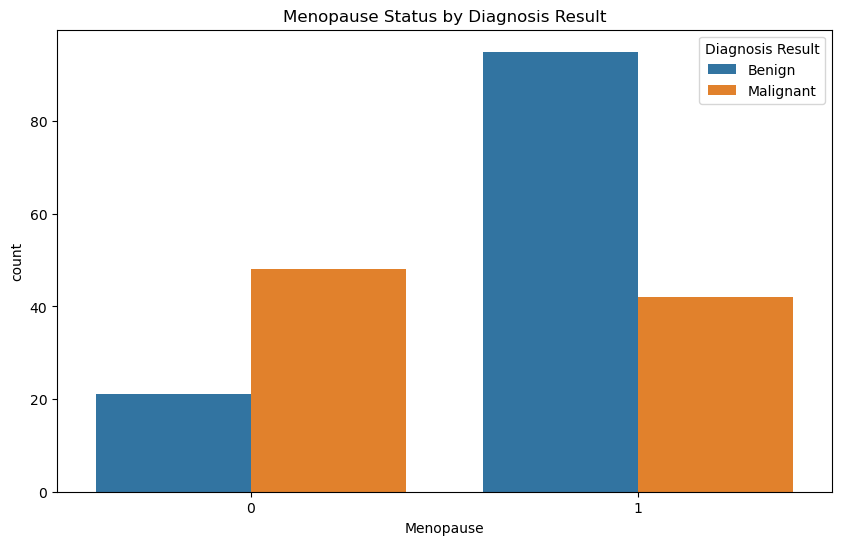

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Menopause', hue='Diagnosis Result', data=data)
plt.title('Menopause Status by Diagnosis Result')
plt.show()

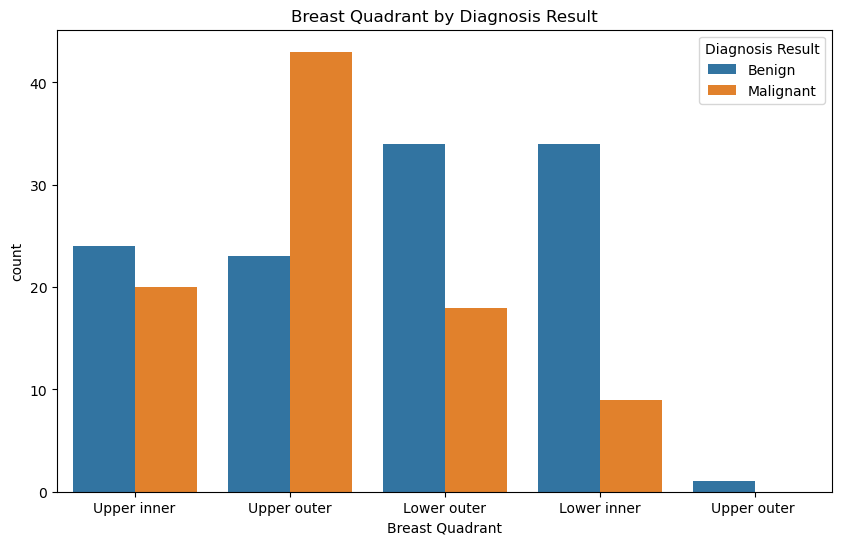

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Breast Quadrant', hue='Diagnosis Result', data=data)
plt.title('Breast Quadrant by Diagnosis Result')
plt.show()


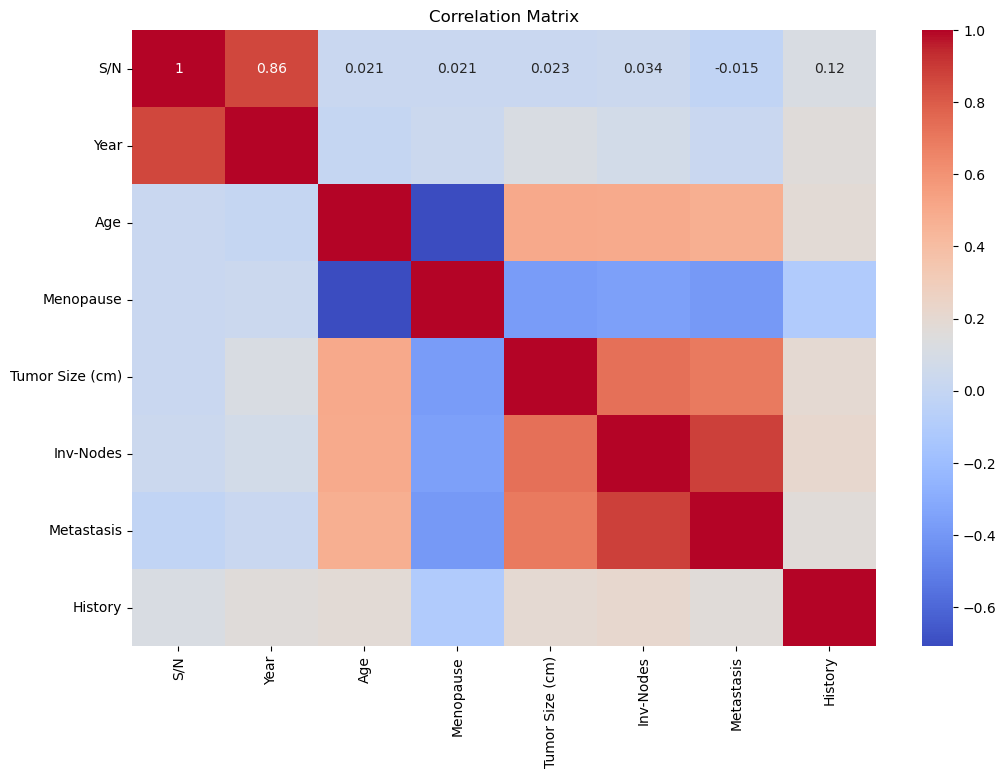

In [9]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Convert 'Tumor Size (cm)' to numeric, coerce errors to NaN
data['Tumor Size (cm)'] = pd.to_numeric(data['Tumor Size (cm)'], errors='coerce')

# Check for any remaining NaN values in 'Tumor Size (cm)'
print(data['Tumor Size (cm)'].isnull().sum())

# Drop rows with NaN values in 'Tumor Size (cm)' for simplicity
data = data.dropna(subset=['Tumor Size (cm)'])

# Convert categorical variables to numeric
labelencoder = LabelEncoder()
data['Diagnosis Result'] = labelencoder.fit_transform(data['Diagnosis Result'])
data['Breast'] = labelencoder.fit_transform(data['Breast'])
data['Breast Quadrant'] = labelencoder.fit_transform(data['Breast Quadrant'])
data['Menopause'] = labelencoder.fit_transform(data['Menopause'])


0


In [11]:
# Features and target variable
X = data.drop(columns=['Diagnosis Result', 'S/N'])
y = data['Diagnosis Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.96      0.84      0.90        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



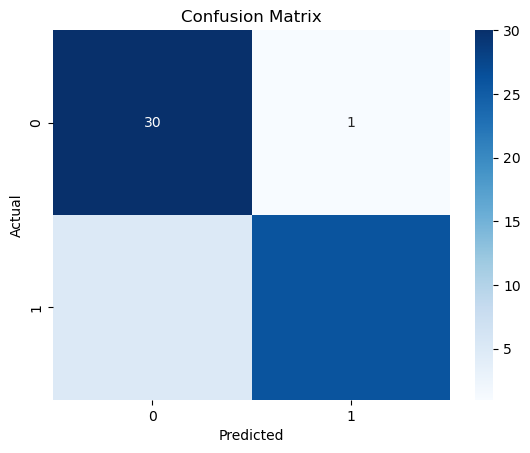

In [13]:
# Predictions
y_pred = dt_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


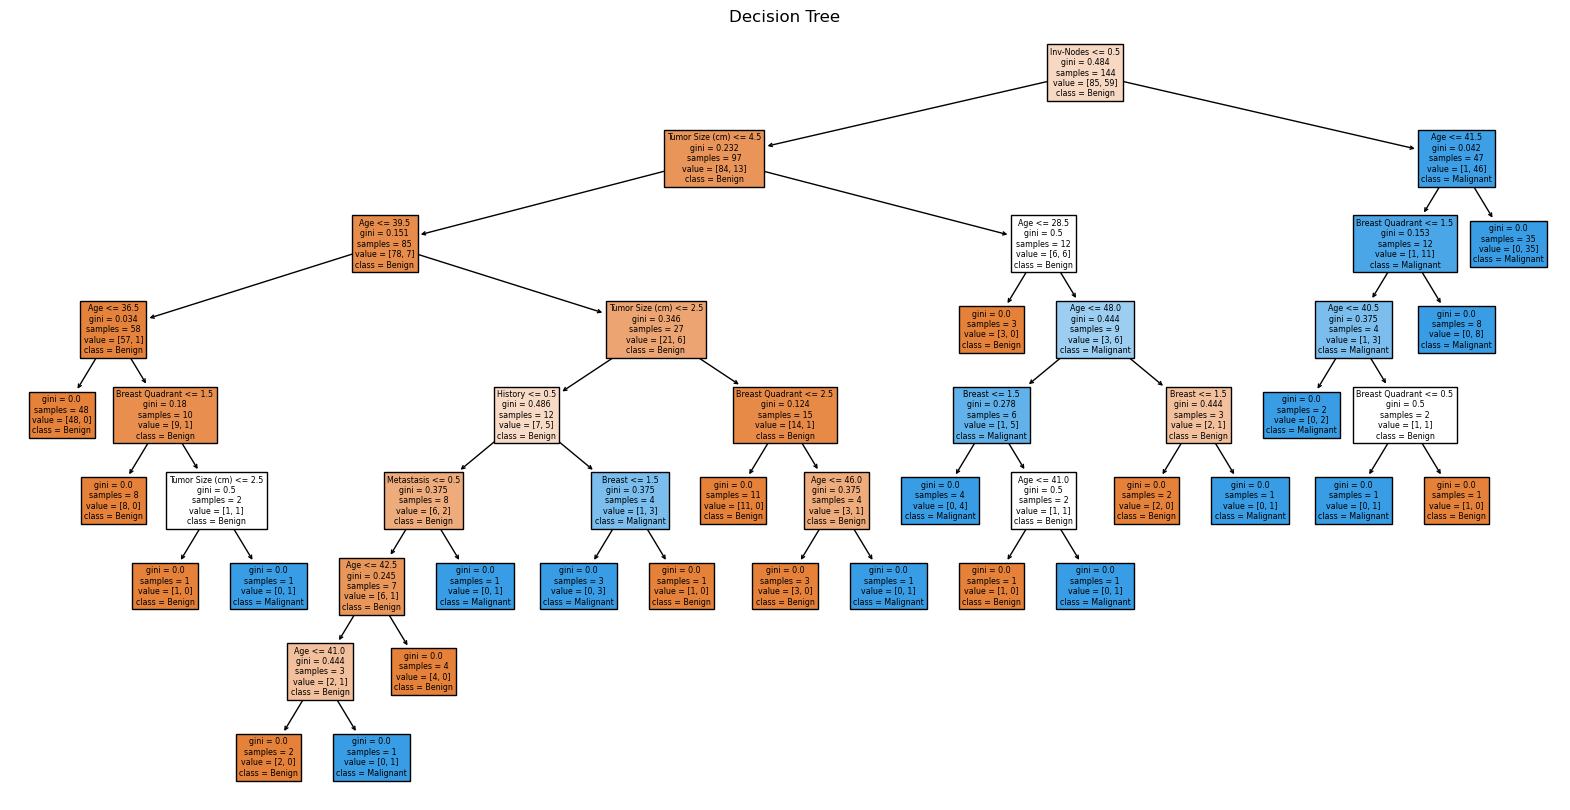

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title('Decision Tree')
plt.show()


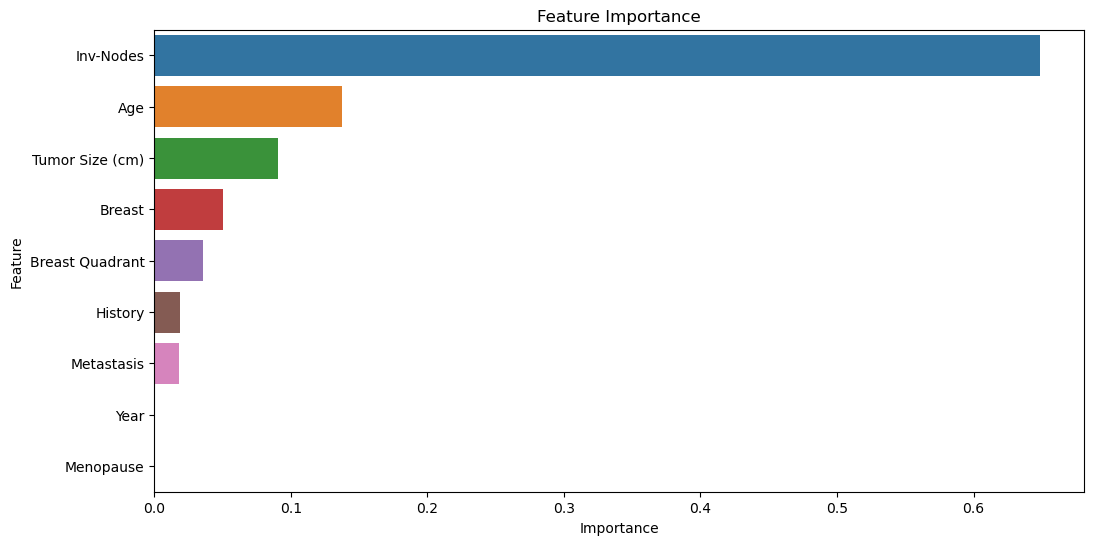

In [15]:
# Feature importance from the decision tree model
feature_importances = dt_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feat_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Feature Importance')
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.93      0.81      0.86        31

    accuracy                           0.87        62
   macro avg       0.88      0.87      0.87        62
weighted avg       0.88      0.87      0.87        62



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.96      0.84      0.90        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



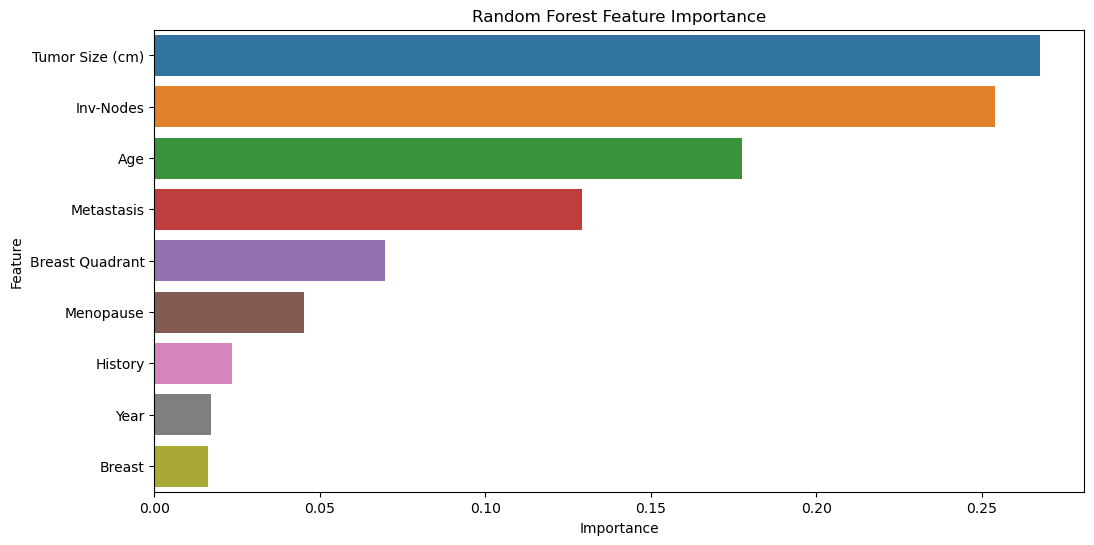

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importances_rf = rf_model.feature_importances_
feat_importances_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
feat_importances_rf = feat_importances_rf.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances_rf)
plt.title('Random Forest Feature Importance')
plt.show()


In [18]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        31
           1       0.00      0.00      0.00        31

    accuracy                           0.50        62
   macro avg       0.25      0.50      0.33        62
weighted avg       0.25      0.50      0.33        62



C:\Users\Lexer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lexer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lexer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


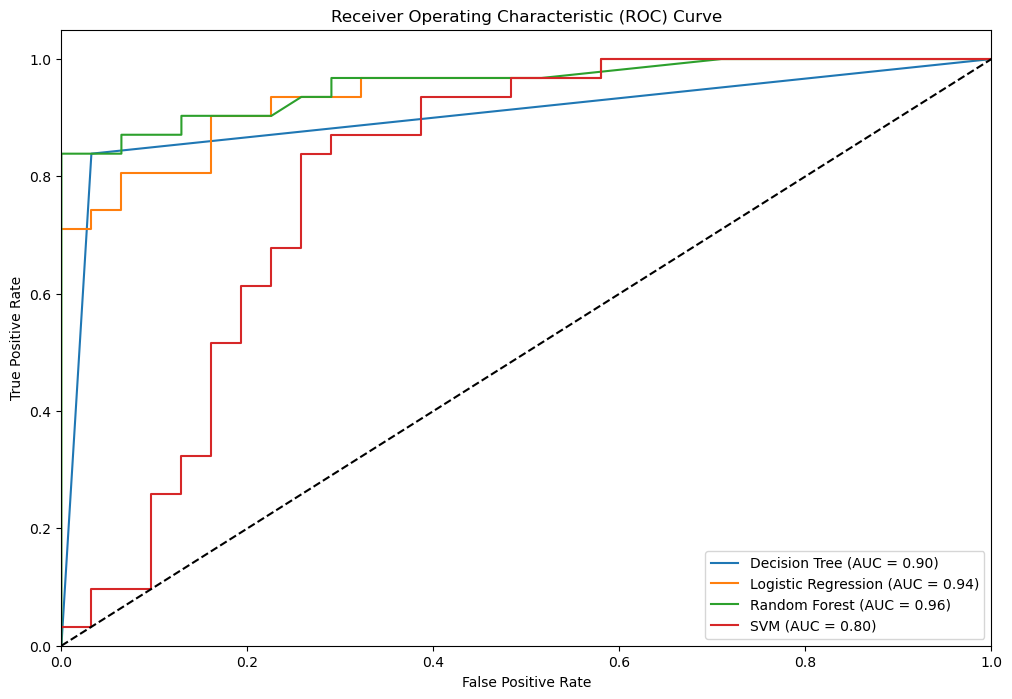

In [19]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
models = {
    'Decision Tree': dt_model,
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    if model_name == 'SVM':
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
